### 2.Random Sample Implutation


Aim: Random sample imputation consists of taking random obervation from the dataset and we use this observation to replicate the nan value.

1. This is use for Missing completely at random (MCAR)

In [1]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\Feature-Engineering-Live-sessions-master\titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df.isnull().mean()     # for pecentage of data missing

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
df["Age"].isnull().sum()

177

In [16]:
df['Age'].dropna().sample(df["Age"].isnull().sum(),random_state=0)  # random_state is use to fix the value so thatb it will not keep changeing
# dropna use because we are picking the sample from the data where Nanshould not be there

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [14]:
df['Age'].dropna().sample()   # sample is picking up any random value and dropna will remove all nan

113    20.0
Name: Age, dtype: float64

In [19]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    #it will have the sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [20]:
median=df.Age.median()

In [21]:
median

28.0

In [23]:
impute_nan(df,'Age',median)

In [24]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [25]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

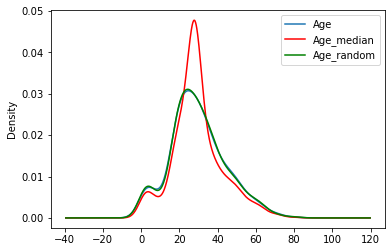

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')  #kde =kernal density estimater
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

almost same distribution of age and age_random

## Advantage:--
1. Easy to impliment.
2. There is less distortion in variance.

## Disadvantages:---
1. Every situation randomness not work.

## 3.Capturing the Nan Value with a new Feature

It works well if the data is naot missing at random (MNAR)

In [31]:
df=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\Feature-Engineering-Live-sessions-master\titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
import numpy as np
df['Age-NAN']=np.where(df["Age"].isnull(),1,0)

In [33]:
df

,Survived,Age,Fare,Age-NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [34]:
df.Age.median()

28.0

In [35]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [37]:
df.head(50)

,Survived,Age,Fare,Age-NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Its don!!!

### Advantages:
1.Easy to implement
2.Capturing the importance of missing values
### Disadvantages:
1.Creating addition features(leads to curse pf dimentionality)

## 4.End of distribution imputation

In [38]:
df=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\Feature-Engineering-Live-sessions-master\titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

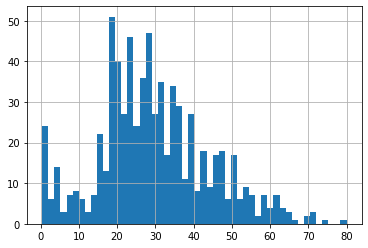

In [42]:
df.Age.hist(bins=50)

In [43]:
df.Age.mean()

29.69911764705882

In [46]:
extreme=df.Age.mean()+3*df.Age.std()

In [47]:
extreme

73.27860964406095

C:\Users\RANJEET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

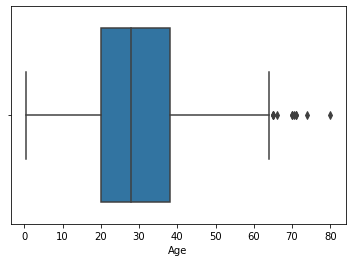

In [45]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [50]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [51]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [56]:
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


In [55]:
df.isnull().sum()

Survived                0
Age                     0
Fare                    0
Age_end_distribution    0
dtype: int64

<AxesSubplot:>

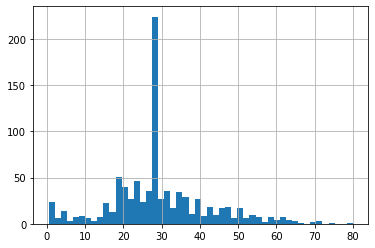

In [57]:
df.Age.hist(bins=50)

<AxesSubplot:>

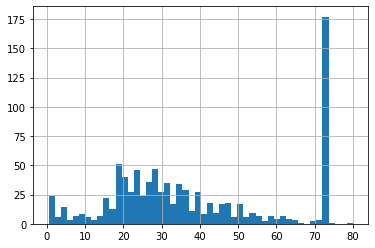

In [59]:
df.Age_end_distribution.hist(bins=50)

C:\Users\RANJEET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

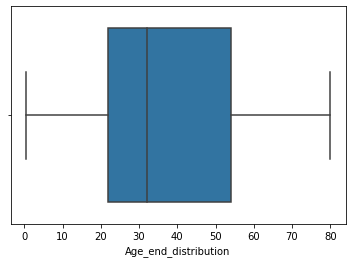

In [60]:
sns.boxplot('Age_end_distribution',data=df)

### Advantages:
     1.Easy to implement
     2.Captures the impportance of missingness if there is one
### Disadvantages:
     1.Distorts the original distribution of the variable.
     2.If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
    3.If the number of NA is big ,it will mask true outliers in the distribution
    4.If the number of NA is small, the replace NA may be considered an outlier and pre-processing in a subsequent staf feture engineering.

## 5. Arbitrary Value Imputation

This technique was derived from kaggle competition.
It consists of replacing NAN by an arbitrary value

In [62]:
df=pd.read_csv(r'G:\DATA_SCIENCE\EDA\Dataset\Feature-Engineering-Live-sessions-master\titanic.csv', usecols=['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [63]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)
    df[variable+'_zero']=df[variable].fillna(0)

### Arbitrary value: 
#### 1.It should  be more frequently present
### Advantages:
1.Easy to impelement
2.Capture the importance if there is one
### Disadvantages:
1.Distorets the original distribution of the variable.
2.If missingness is not important,it may mask the predictive power of the original variable by distoring its distribution.
3.Hard to decide which value to use.

## 6. How to handle categorical misssing values
### Frequent Category Imputation

In [66]:
df=pd.read_csv(r'loan.csv.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [71]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [73]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [75]:
df.shape

(1460, 4)

## Missing values for categorical Dataset
### 1.compute the frequency wih every feature

In [76]:
df.groupby(['BsmtQual'])

In [77]:
df.groupby(['BsmtQual'])['BsmtQual']

In [78]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

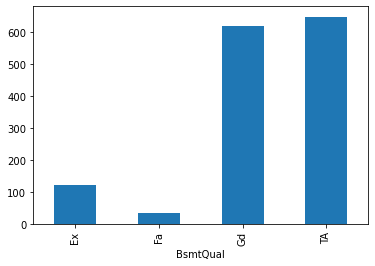

In [80]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

<AxesSubplot:xlabel='BsmtQual'>

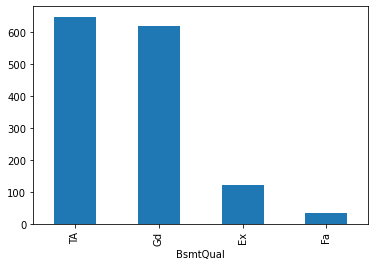

In [81]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

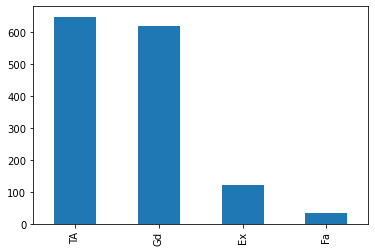

In [83]:
df['BsmtQual'].value_counts().plot.bar()

<AxesSubplot:>

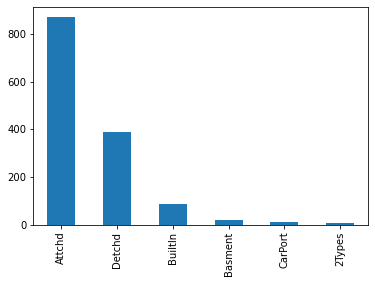

In [84]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

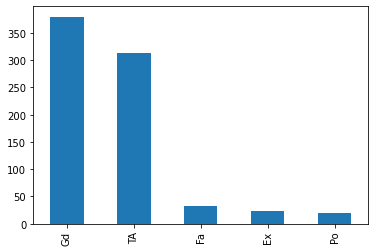

In [87]:
df['FireplaceQu'].value_counts().plot.bar()

In [88]:
#### Replacing function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [89]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [90]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages:
1.Easy to implement
2.Fater war to implement
#### Disadvantages:
1.since we are using the more frequent labels,it may use them in an over represented way,if there are many NaNs
2.It distores the relation of the most frequent labels.

## 2. Adding a variable to capture the Nan

In [100]:
df=pd.read_csv(r'loan.csv.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [101]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [102]:
    df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [99]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [104]:
frequent=df['BsmtQual'].mode()[0]

In [106]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [107]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [108]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu_var'].fillna(frequent,inplace=True)

In [109]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### suppose if you have more frequent categories ,we just replace NAN with the new category

In [110]:
df=pd.read_csv(r'loan.csv.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [111]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [112]:
def impute_nan(df,variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),'Missing',df[variable])

In [113]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [114]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


After this we will drop the old feture and keep the new feature.

In [118]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [119]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
